Standard process inputs
============

In [1]:
import sympy
sympy.init_printing()
%matplotlib inline

## Step

A step input of magnitude $M$ can be written as
$$u_S(t)=\begin{cases}
    0&  t<0,\\
    M&  t\geq 0
\end{cases}$$

Sympy supplies a unit step function called `Heaviside`, which is typeset as $\theta(t)$

In [2]:
t = sympy.symbols('t')

In [3]:
S = sympy.Heaviside

In [4]:
M = 2

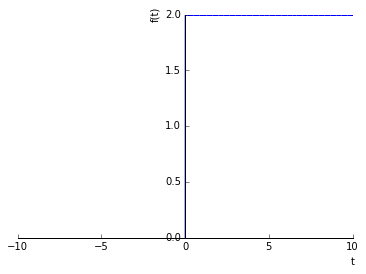

In [5]:
sympy.plot(M*S(t))

## Scaling and translation

We can scale and translate the step function in the normal way

In [6]:
M, s = sympy.symbols('M, s')

In [7]:
sympy.laplace_transform(S(t), t, s, noconds=True)

In [8]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [9]:
L(M*S(t))

In [10]:
from ipywidgets import interact

In [11]:
def translated_step(scale, y_translation, t_translation):
    f = scale*S(t - t_translation) + y_translation
    print("f =", f, "  ℒ(f) =", L(f))
    sympy.plot(f,
              (t, -10, 10),
              ylim=(-2, 4))

f = 1.75*Heaviside(t - 2.5)   ℒ(f) = 1.75*exp(-2.5*s)/s


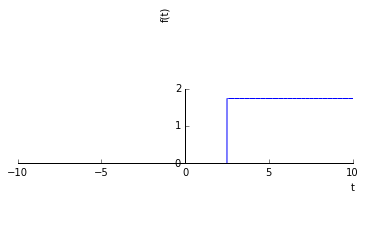

<function __main__.translated_step>

In [12]:
interact(translated_step, 
         scale=(0.5, 3.), 
         y_translation=(-1., 1.), 
         t_translation=(0., 5.))

We can constuct any piecewise constant function by adding together step functions shifted in time.

## Rectangular pulse

We can construct a rectangular pulse, of height $h$ and width $t_w$,

$$u_{RP}(t)=\begin{cases}
    0&  t<0,\\
    h& 0 \leq t < t_w\\
    0&  t \geq t_w
\end{cases}$$

by using shifted versions of the step, so that

In [13]:
h, t_w = sympy.symbols('h, t_w')
u_RP = h*(S(t - 0) - S(t - t_w))

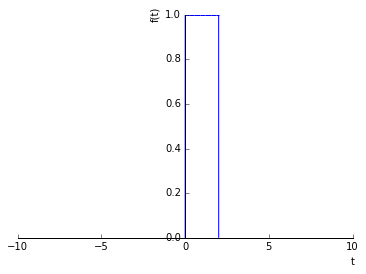

In [14]:
sympy.plot(u_RP.subs({h: 1, t_w: 2}))

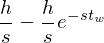

In [15]:
L(u_RP)

## Ramp

In [16]:
ramp = sympy.integrate(S(t))
ramp

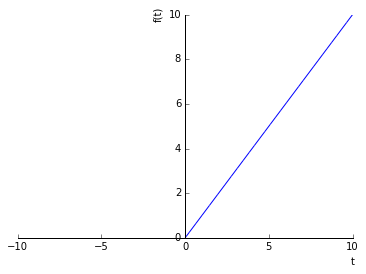

In [17]:
sympy.plot(ramp)

In [18]:
L(ramp)

We can construct any continuous piecewise linear function by adding together ramp functions shifted in time.

## Triangular pulse

For instance, we can construct a triangular pulse by adding three ramps together.

In [19]:
r1 = t*S(t - 0)
r2 = -2*(t - t_w/2)*S(t - t_w/2)
r3 = (t - t_w)*S(t - t_w)
u_TP = 2/t_w*(r1 + r2 + r3)

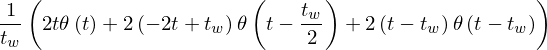

In [20]:
u_TP

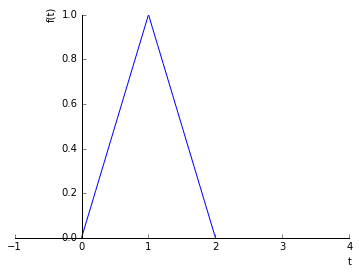

In [21]:
sympy.plot(u_TP.subs({t_w: 2}), (t, -1, 4))

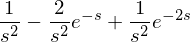

In [22]:
L(u_TP.subs({t_w: 2})).expand()

Notice that there are three ramps here (one may have expected only two). It becomes more clear when we think about the derivative of this function:

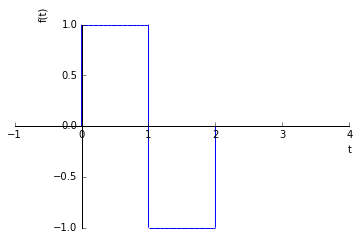

In [23]:
sympy.plot(u_TP.diff(t).subs({t_w: 2}), (t, -1, 4), ylim=(-1.1, 1.1))

This shows that there would be three steps required to model the derivative, which means three ramps for the original function.

## General rule

In general we can write any piecewise linear function using as many ramps as there are changes of slope plus as many steps as there are discontinuities.